In [2035]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import NeuralNetwork as NN
import Layer
import importlib
importlib.reload(NN)
importlib.reload(Layer)

<module 'Layer' from '/Users/jorchard/Dropbox/research/peBogacz/python/Layer.py'>

In [2091]:
net = NN.NeuralNetwork()
l = Layer.InputPELayer(n=2)
net.AddLayer(l)
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.TopPELayer(n=2))

In [2092]:
net.SetIdentityWeights()
net.SetInput([1., 1])
net.SetExpectation([1., 1])
# net.layers[1].v[0] = 1.
# net.layers[2].v[0] = 1.
# net.layers[1].v[1] = 1.
# net.layers[2].v[1] = 1.


In [2093]:
net.layers[-1].b = torch.zeros(2)
#for l in net.layers:
#    l.b[1] = 0.
net.layers[0].SetBias([0., 0.2384])
net.layers[1].SetBias([0.2384, 0.2384])
net.ShowBias()
net.learn = True
net.learn_weights = True
net.learn_biases = True

  b = [0.     0.2384]
  b = [0.2384 0.2384]
  b = [0.2384 0.2384]
  b = [0. 0.]


In [2097]:
T = 10
dt = 0.001
tt = np.arange(0, T, dt)

In [2098]:
net.Integrate()
net.layers[1].dbdt
net.Step(dt=0.001)
net.ShowState()

Layer 0 (input):
  v = [1. 1.]
  e = [0.001999   0.00152244]
Layer 1:
  v = [0.00011536 0.00011059]
  e = [-0.00944064 -0.00944064]
Layer 2:
  v = [0.00030466 0.00030466]
  e = [-0.03959977 -0.03959977]
Layer 3 (expectation):
  v = [1. 1.]


In [2099]:
net.ShowBias()

  b = [2.0000000e-07 2.3840015e-01]
  b = [0.23839904 0.23839904]
  b = [0.238396 0.238396]
  b = [0. 0.]


In [2100]:
net.ShowWeights()

  W01 = 
[[0.99960005 0.        ]
 [0.         0.99960005]]
  M10 = 
[[0.99960005 0.        ]
 [0.         0.99960005]]
  W12 = 
[[0.99960005 0.        ]
 [0.         0.99960005]]
  M21 = 
[[0.99960005 0.        ]
 [0.         0.99960005]]
  W23 = 
[[1. 0.]
 [0. 1.]]
  M32 = 
[[1. 0.]
 [0. 1.]]


In [2104]:
net.Run(T, dt=dt)
net.ShowState()
net.ShowBias()

Layer 0 (input):
  v = [1. 1.]
  e = [-0.0040622   0.00330946]
Layer 1:
  v = [0.30236292 0.24762057]
  e = [0.00014949 0.00029454]
Layer 2:
  v = [1.0045736  0.99187464]
  e = [-1.0677161e-06  1.5547471e-06]
Layer 3 (expectation):
  v = [1. 1.]
  b = [1.0214527 1.0132393]
  b = [0.28357545 0.22683606]
  b = [0.24298047 0.23027875]
  b = [0. 0.]


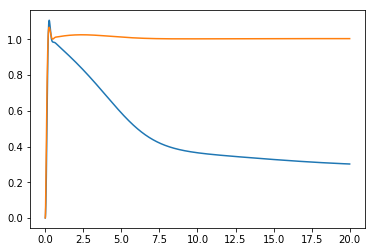

In [2105]:
plt.plot(np.array(net.t_history), np.array(net.layers[1].v_history)[:,0],
         np.array(net.t_history), np.array(net.layers[2].v_history)[:,0]);

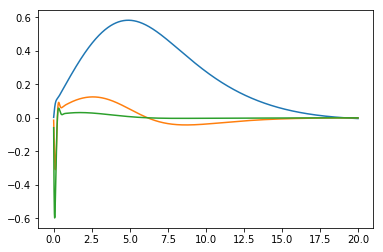

In [2106]:
plt.plot(np.array(net.t_history), np.array(net.layers[0].e_history)[:,0],
         np.array(net.t_history), np.array(net.layers[1].e_history)[:,0],
         np.array(net.t_history), np.array(net.layers[2].e_history)[:,0]);

In [2107]:
net.ShowWeights()

  W01 = 
[[-0.01802441 -0.03146773]
 [-0.03300606 -0.01002346]]
  M10 = 
[[-0.01802441 -0.03300606]
 [-0.03146773 -0.01002346]]
  W12 = 
[[0.0213662  0.00435879]
 [0.00305408 0.02262837]]
  M21 = 
[[0.0213662  0.00305408]
 [0.00435879 0.02262837]]
  W23 = 
[[1. 0.]
 [0. 1.]]
  M32 = 
[[1. 0.]
 [0. 1.]]


In [2108]:
net.ShowBias()

  b = [1.0214527 1.0132393]
  b = [0.28357545 0.22683606]
  b = [0.24298047 0.23027875]
  b = [0. 0.]


In [2114]:
net.M[0]@np.tanh(net.layers[1].v) + net.layers[0].b

tensor([ 1.0082,  1.0016])